In [1]:
import skimage.io
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


/Users/baart_f/.virtualenvs/main/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
img = skimage.io.imread('/Users/baart_f/Documents/tellen.png')

(True, False)

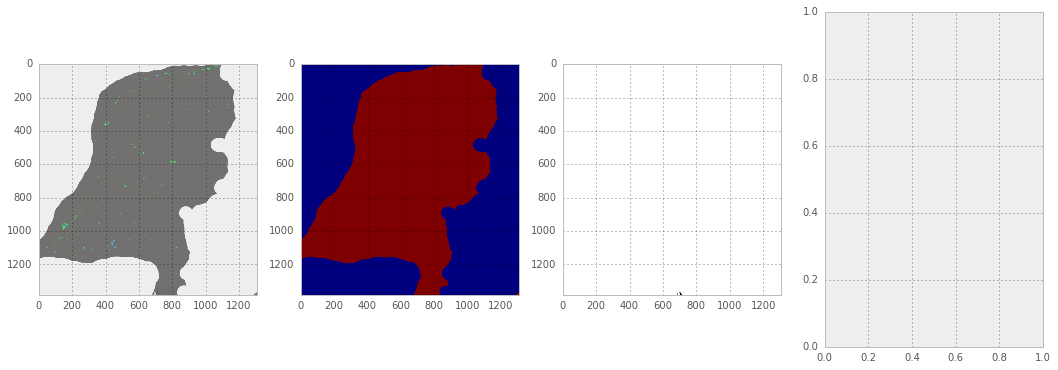

In [3]:
fig, axes = plt.subplots(1, 4, figsize=(18,6))
axes[0].imshow(img)
is_nl = img[:,:,3] > 0
axes[1].imshow(is_nl)
new_land = np.logical_and(img[:,:,1] < 100, is_nl)
new_water = np.logical_and(img[:,:,2] > 105, is_nl)


axes[2].imshow(new_land, cmap='Greys')
new_land.any(), new_land.all()

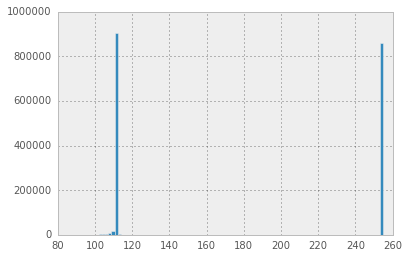

In [4]:
_ = plt.hist(img[:,:,2].ravel(), bins=100)

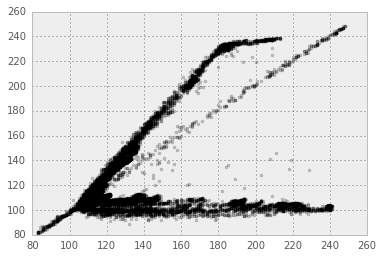

In [5]:
plt.plot(
    img[is_nl,1].ravel(), 
    img[is_nl,2].ravel(), 
    'k.', alpha=0.2
) 

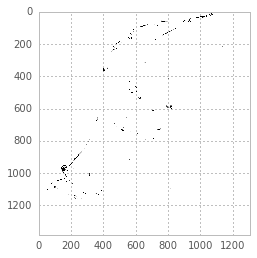

In [6]:
# bottom right
new_land = np.logical_and.reduce([
        img[:,:,2] < 120, 
        img[:,:,1] > 120, 
        is_nl
])
plt.imshow(new_land, cmap='Greys')

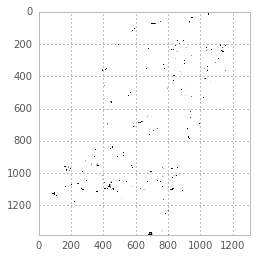

In [7]:
# top
new_water = np.logical_and.reduce([
        img[:,:,2] >= 120, 
        img[:,:,1] > 100, 
        is_nl
])
plt.imshow(new_water, cmap='Greys')

In [8]:
print(new_land.sum()/is_nl.sum(), new_water.sum()/is_nl.sum())

0.00646476314136 0.00627400309432


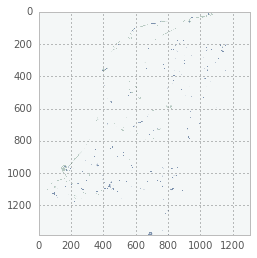

In [10]:
plt.imshow(new_land, cmap='Greens', alpha=0.5)
plt.imshow(new_water, cmap='Blues', alpha=0.5)